# Preliminary Data Exploration
In this notebook we will do some preliminary data exploration and visualization in order to better understand how to proceed with the modelling.

In [1]:
%matplotlib notebook
# We start off with the baseline import statements we need to do the basic data manipulation and visualization.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

In [2]:
#We create and set aside a copy of the data for initial exploration
housing_train = pd.read_csv('../data/train.csv')
housing = housing_train.copy()

In [3]:
housing.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In the training data there are 81 features with 1460 examples of houses. The features seem to run the gamut from numerical to qualitative. It seems like the ones which are missing data are features that not every house may have, like pools, garages, fireplaces etc. The dataset is taken from the Ames, Iowa housing dataset from 2006-2010 so the housing prices are a little bit out of date.

In [5]:
housing.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ...   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000  ...   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

# Missing Data
- Seems like there is a lot of missing pool data and alley data. One strategy could be to remove it now and then later see the effect that adding a pool to houses that are comparable might have. We first look at the missing data and decide to remove the ones which are missing for very many houses.

In [6]:
#missing data
total = housing.isnull().sum().sort_values(ascending=False)
percent = (housing.isnull().sum()/housing.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(10)

Total   Percent
PoolQC         1453  0.995205
MiscFeature    1406  0.963014
Alley          1369  0.937671
Fence          1179  0.807534
FireplaceQu     690  0.472603
LotFrontage     259  0.177397
GarageYrBlt      81  0.055479
GarageCond       81  0.055479
GarageType       81  0.055479
GarageFinish     81  0.055479

Data from the following attributes are missing in a significant amount of houses and will be dropped
- PoolQC
- By extension we will also drop PoolArea
- MiscFeature
- By extension we will also be dropping 'MiscVal'
- Alley
- Fence
- FireplaceQu
- By extension we will be dropping Fireplaces
- LotFrontage is borderline but we will be dropping it

In [7]:
#Code to drop the attributes from our training set
drop = ['PoolQC', 'PoolArea','MiscFeature', 'MiscVal', 'Alley', 'Fence', 'FireplaceQu', 'Fireplaces', 'LotFrontage']
housing = housing.drop(columns = drop)

In [8]:
#Categorical Data (There is 38 of these after dropping)
categorical_data = housing.select_dtypes(exclude=[np.number])
categorical_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 38 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSZoning       1460 non-null   object
 1   Street         1460 non-null   object
 2   LotShape       1460 non-null   object
 3   LandContour    1460 non-null   object
 4   Utilities      1460 non-null   object
 5   LotConfig      1460 non-null   object
 6   LandSlope      1460 non-null   object
 7   Neighborhood   1460 non-null   object
 8   Condition1     1460 non-null   object
 9   Condition2     1460 non-null   object
 10  BldgType       1460 non-null   object
 11  HouseStyle     1460 non-null   object
 12  RoofStyle      1460 non-null   object
 13  RoofMatl       1460 non-null   object
 14  Exterior1st    1460 non-null   object
 15  Exterior2nd    1460 non-null   object
 16  MasVnrType     1452 non-null   object
 17  ExterQual      1460 non-null   object
 18  ExterCond      1460 non-null

Most of the missing categorical data seems to be related to basement and garage related features. We can impute by givina new value. There's a chance this data also might not matter in the grand scheme of things as much as whether someone actually has a basement or not.

Here we have the numerical data, although some is actually categorical and/or useless need to see which ones are

In [9]:
#Numerical Data (There is 34 of these after we have dropped)
numeric_data = housing.select_dtypes(include=[np.number])
numeric_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 34 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   LotArea        1460 non-null   int64  
 3   OverallQual    1460 non-null   int64  
 4   OverallCond    1460 non-null   int64  
 5   YearBuilt      1460 non-null   int64  
 6   YearRemodAdd   1460 non-null   int64  
 7   MasVnrArea     1452 non-null   float64
 8   BsmtFinSF1     1460 non-null   int64  
 9   BsmtFinSF2     1460 non-null   int64  
 10  BsmtUnfSF      1460 non-null   int64  
 11  TotalBsmtSF    1460 non-null   int64  
 12  1stFlrSF       1460 non-null   int64  
 13  2ndFlrSF       1460 non-null   int64  
 14  LowQualFinSF   1460 non-null   int64  
 15  GrLivArea      1460 non-null   int64  
 16  BsmtFullBath   1460 non-null   int64  
 17  BsmtHalfBath   1460 non-null   int64  
 18  FullBath

# Plotting the Numerical Data

We first want to visualize the numerical and unbounded data. Unbounded data are things like square footage. Bounded data are things like quality and condition. 

Some initial tranformations to consider are adding the age of the house when sold as well as the time since remodeling. We may want to delete the year that it was first built, but keeping the year of sell might be interesting because of the financial meltdown of 08/09 that took place during this time. 


In [10]:
 #We make an age transformation and add it to the numerical data subtracting YearBuilt from YearSold
age = housing['YrSold'] - housing['YearBuilt']
remodel_age = housing['YrSold'] - housing['YearRemodAdd']
housing['Age'] = age
housing['AgeRemodel'] = remodel_age

In [11]:
# It turns out that some house was remodeled after it was sold. We just drop it from the dataset
housing = housing[housing.AgeRemodel >= 0]
#We drop the year the house was built as well as the year the house was remodelled
housing = housing.drop(columns = ['YearBuilt','YearRemodAdd'])

We first look at the correlations to see which features SalePrice correlates best with. We notice that of the numeric data the most correlated seem to be Overall Quality and the above ground living area in terms of square feet. Then Garage cars and garage area. We plot the scatter matrices of the top 5 correlated attributes below.

In [12]:
corr_matrix = housing.corr()

In [13]:
corr_matrix['SalePrice'].sort_values(ascending = False)

SalePrice        1.000000
OverallQual      0.793055
GrLivArea        0.717382
GarageCars       0.640954
GarageArea       0.624160
TotalBsmtSF      0.618211
1stFlrSF         0.611181
FullBath         0.561887
TotRmsAbvGrd     0.535030
GarageYrBlt      0.486605
MasVnrArea       0.479554
BsmtFinSF1       0.388407
WoodDeckSF       0.324475
2ndFlrSF         0.320062
OpenPorchSF      0.318911
HalfBath         0.284214
LotArea          0.264543
BsmtFullBath     0.227181
BsmtUnfSF        0.214492
BedroomAbvGr     0.168209
ScreenPorch      0.111458
MoSold           0.046417
3SsnPorch        0.044588
BsmtFinSF2      -0.011369
BsmtHalfBath    -0.016837
Id              -0.021902
LowQualFinSF    -0.025602
YrSold          -0.028906
OverallCond     -0.077846
MSSubClass      -0.084287
EnclosedPorch   -0.128572
KitchenAbvGr    -0.135903
AgeRemodel      -0.509276
Age             -0.523573
Name: SalePrice, dtype: float64

<IPython.core.display.Javascript object>


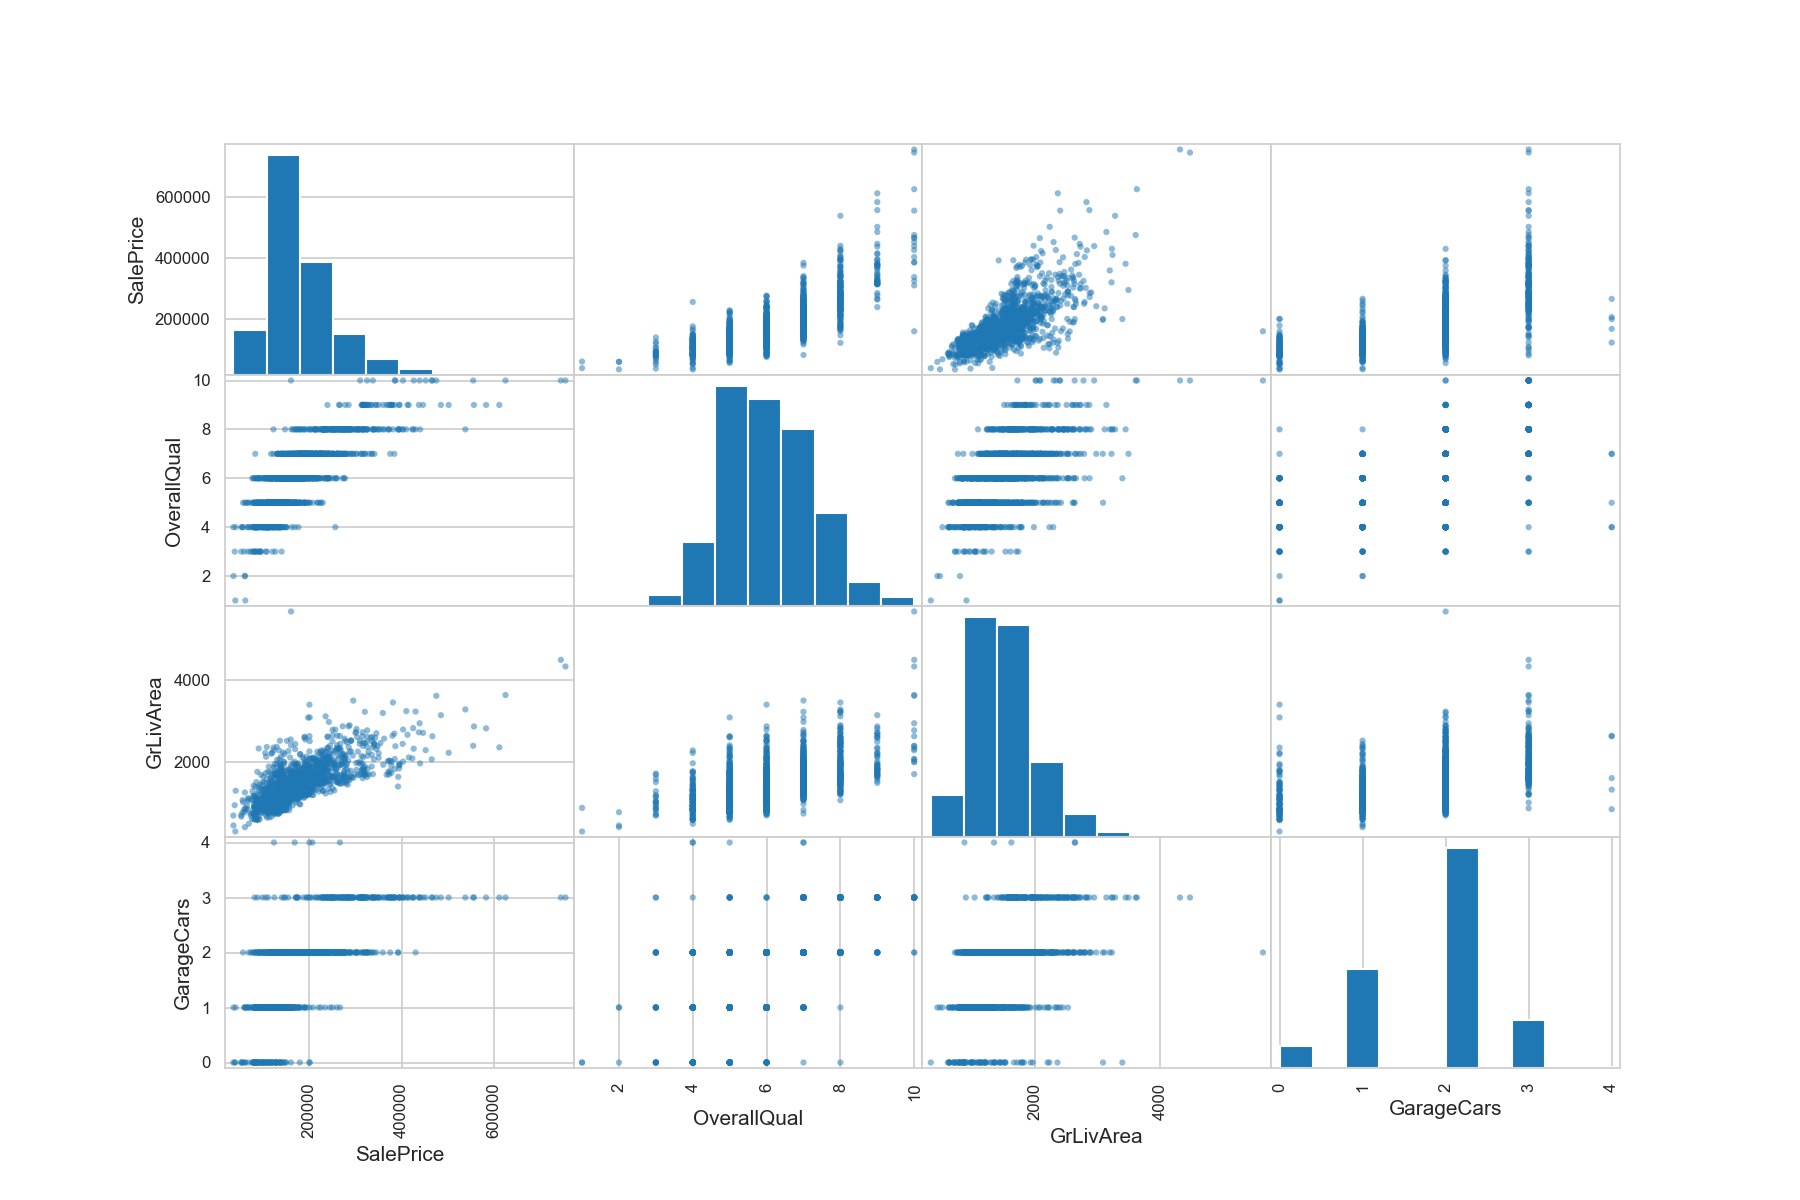

array([[<AxesSubplot:xlabel='SalePrice', ylabel='SalePrice'>,
        <AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>,
        <AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>,
        <AxesSubplot:xlabel='GarageCars', ylabel='SalePrice'>],
       [<AxesSubplot:xlabel='SalePrice', ylabel='OverallQual'>,
        <AxesSubplot:xlabel='OverallQual', ylabel='OverallQual'>,
        <AxesSubplot:xlabel='GrLivArea', ylabel='OverallQual'>,
        <AxesSubplot:xlabel='GarageCars', ylabel='OverallQual'>],
       [<AxesSubplot:xlabel='SalePrice', ylabel='GrLivArea'>,
        <AxesSubplot:xlabel='OverallQual', ylabel='GrLivArea'>,
        <AxesSubplot:xlabel='GrLivArea', ylabel='GrLivArea'>,
        <AxesSubplot:xlabel='GarageCars', ylabel='GrLivArea'>],
       [<AxesSubplot:xlabel='SalePrice', ylabel='GarageCars'>,
        <AxesSubplot:xlabel='OverallQual', ylabel='GarageCars'>,
        <AxesSubplot:xlabel='GrLivArea', ylabel='GarageCars'>,
        <AxesSubplot:xlabel='GarageCars', yla

In [14]:
from pandas.plotting import scatter_matrix
attributes = ['SalePrice','OverallQual', 'GrLivArea', 'GarageCars']
scatter_matrix(housing[attributes], figsize = (12, 8))

<IPython.core.display.Javascript object>


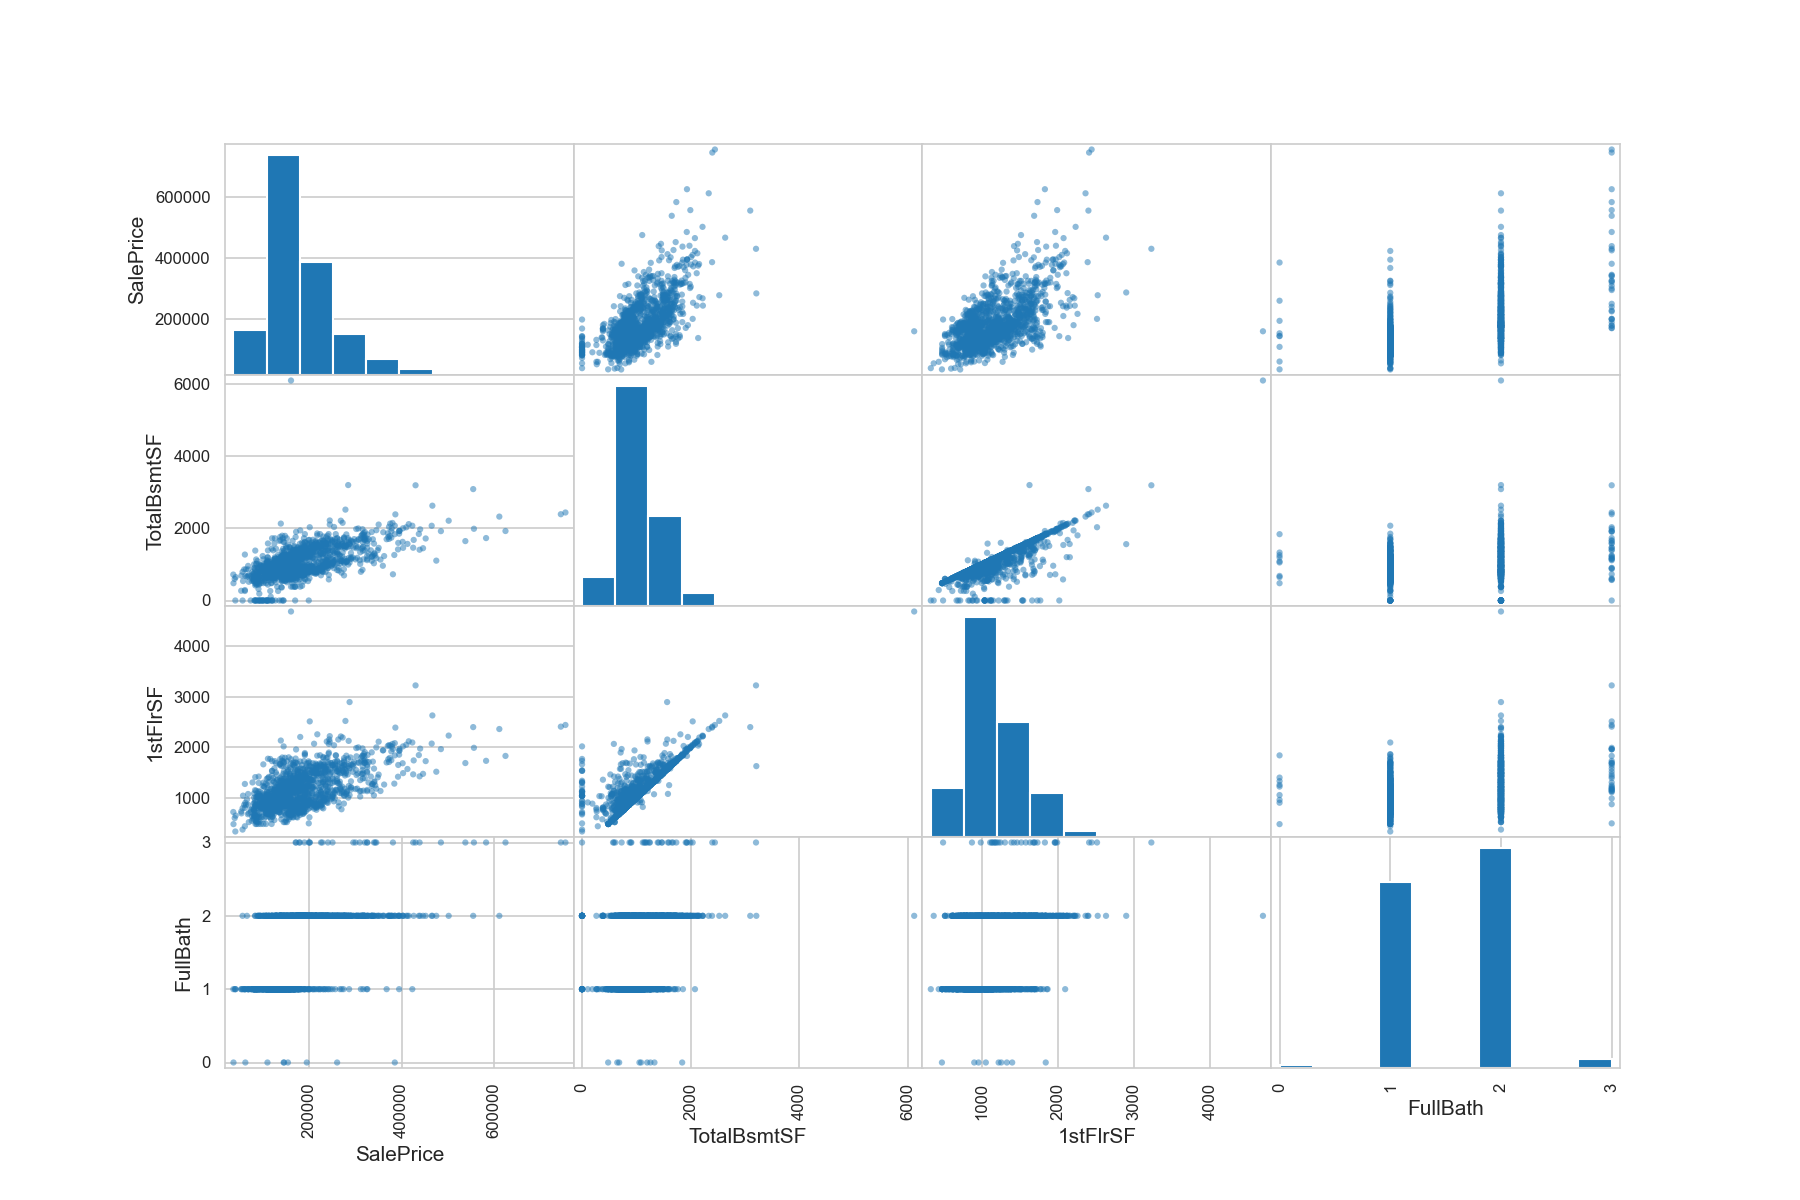

array([[<AxesSubplot:xlabel='SalePrice', ylabel='SalePrice'>,
        <AxesSubplot:xlabel='TotalBsmtSF', ylabel='SalePrice'>,
        <AxesSubplot:xlabel='1stFlrSF', ylabel='SalePrice'>,
        <AxesSubplot:xlabel='FullBath', ylabel='SalePrice'>],
       [<AxesSubplot:xlabel='SalePrice', ylabel='TotalBsmtSF'>,
        <AxesSubplot:xlabel='TotalBsmtSF', ylabel='TotalBsmtSF'>,
        <AxesSubplot:xlabel='1stFlrSF', ylabel='TotalBsmtSF'>,
        <AxesSubplot:xlabel='FullBath', ylabel='TotalBsmtSF'>],
       [<AxesSubplot:xlabel='SalePrice', ylabel='1stFlrSF'>,
        <AxesSubplot:xlabel='TotalBsmtSF', ylabel='1stFlrSF'>,
        <AxesSubplot:xlabel='1stFlrSF', ylabel='1stFlrSF'>,
        <AxesSubplot:xlabel='FullBath', ylabel='1stFlrSF'>],
       [<AxesSubplot:xlabel='SalePrice', ylabel='FullBath'>,
        <AxesSubplot:xlabel='TotalBsmtSF', ylabel='FullBath'>,
        <AxesSubplot:xlabel='1stFlrSF', ylabel='FullBath'>,
        <AxesSubplot:xlabel='FullBath', ylabel='FullBath'>]], dty

In [15]:
attributes = ['SalePrice','TotalBsmtSF','1stFlrSF','FullBath']
scatter_matrix(housing[attributes], figsize = (12, 8))

<IPython.core.display.Javascript object>


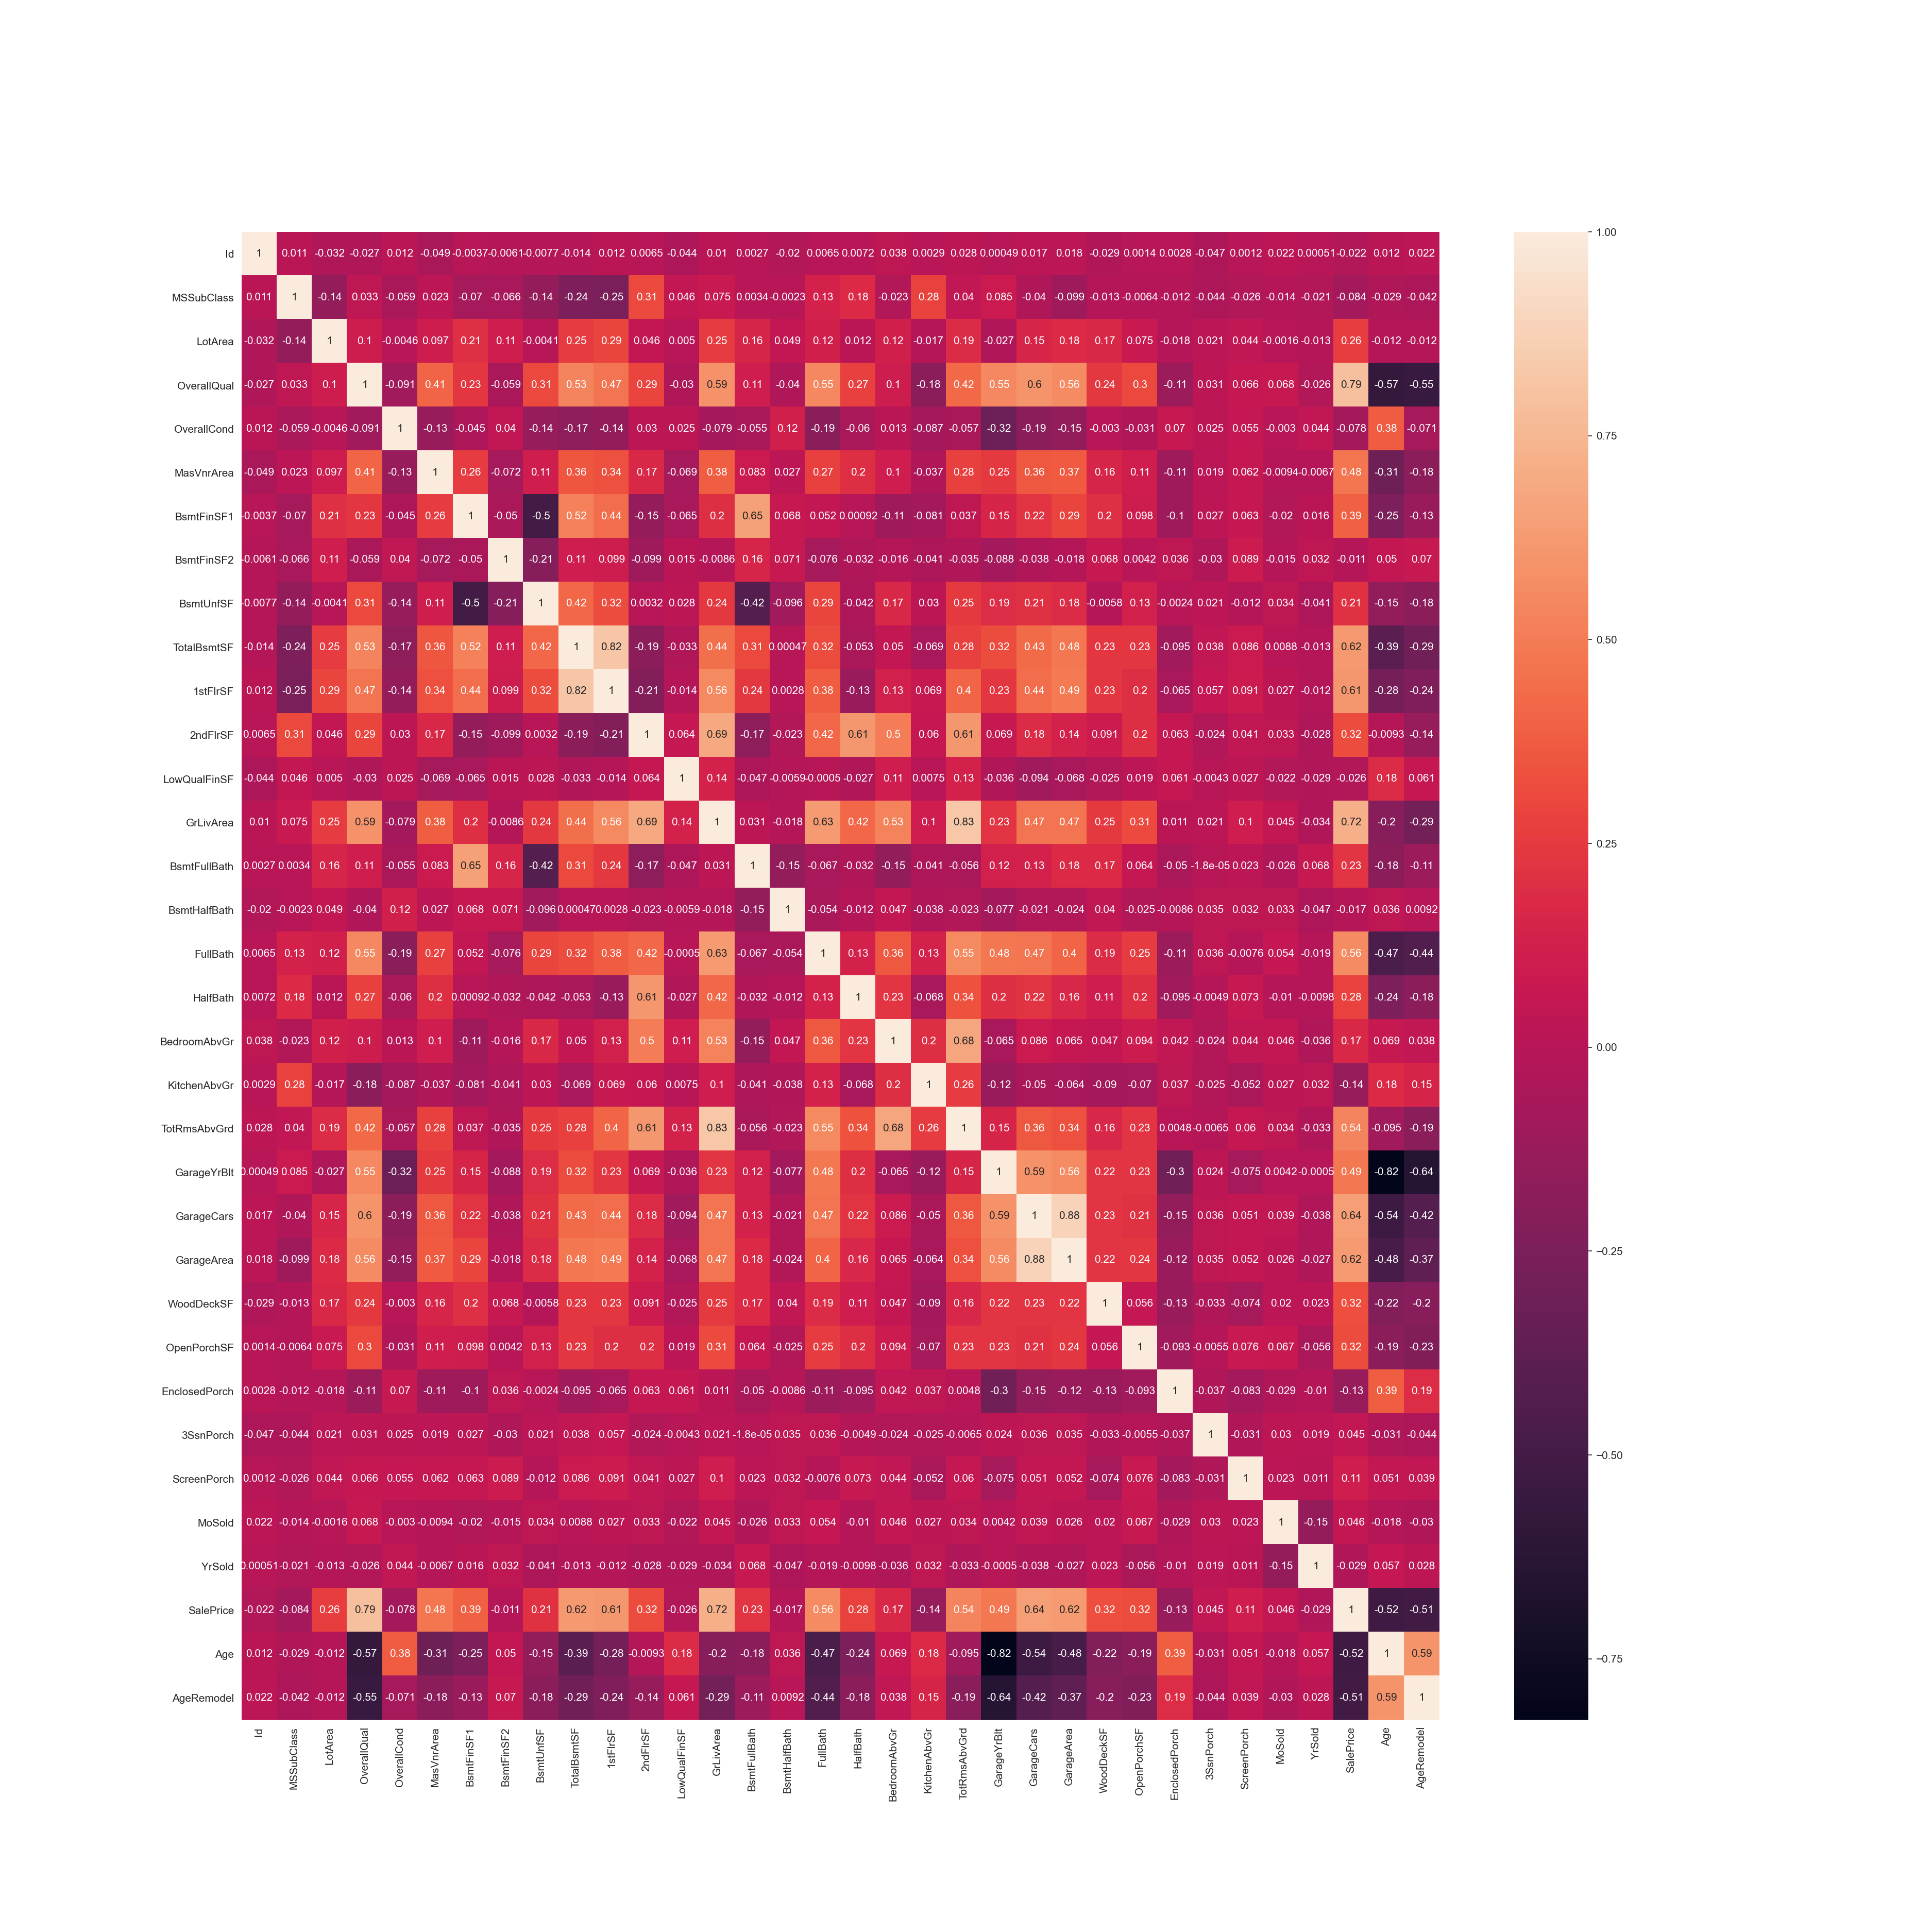

In [16]:
fig, ax = plt.subplots(figsize=(25,25)) 
sns.heatmap(corr_matrix, annot = True, ax = ax)
plt.show()

# Plotting the Categorical Data
Made some violin plots. Am confused about the 0 showing up on the x axis for some of these.

<IPython.core.display.Javascript object>


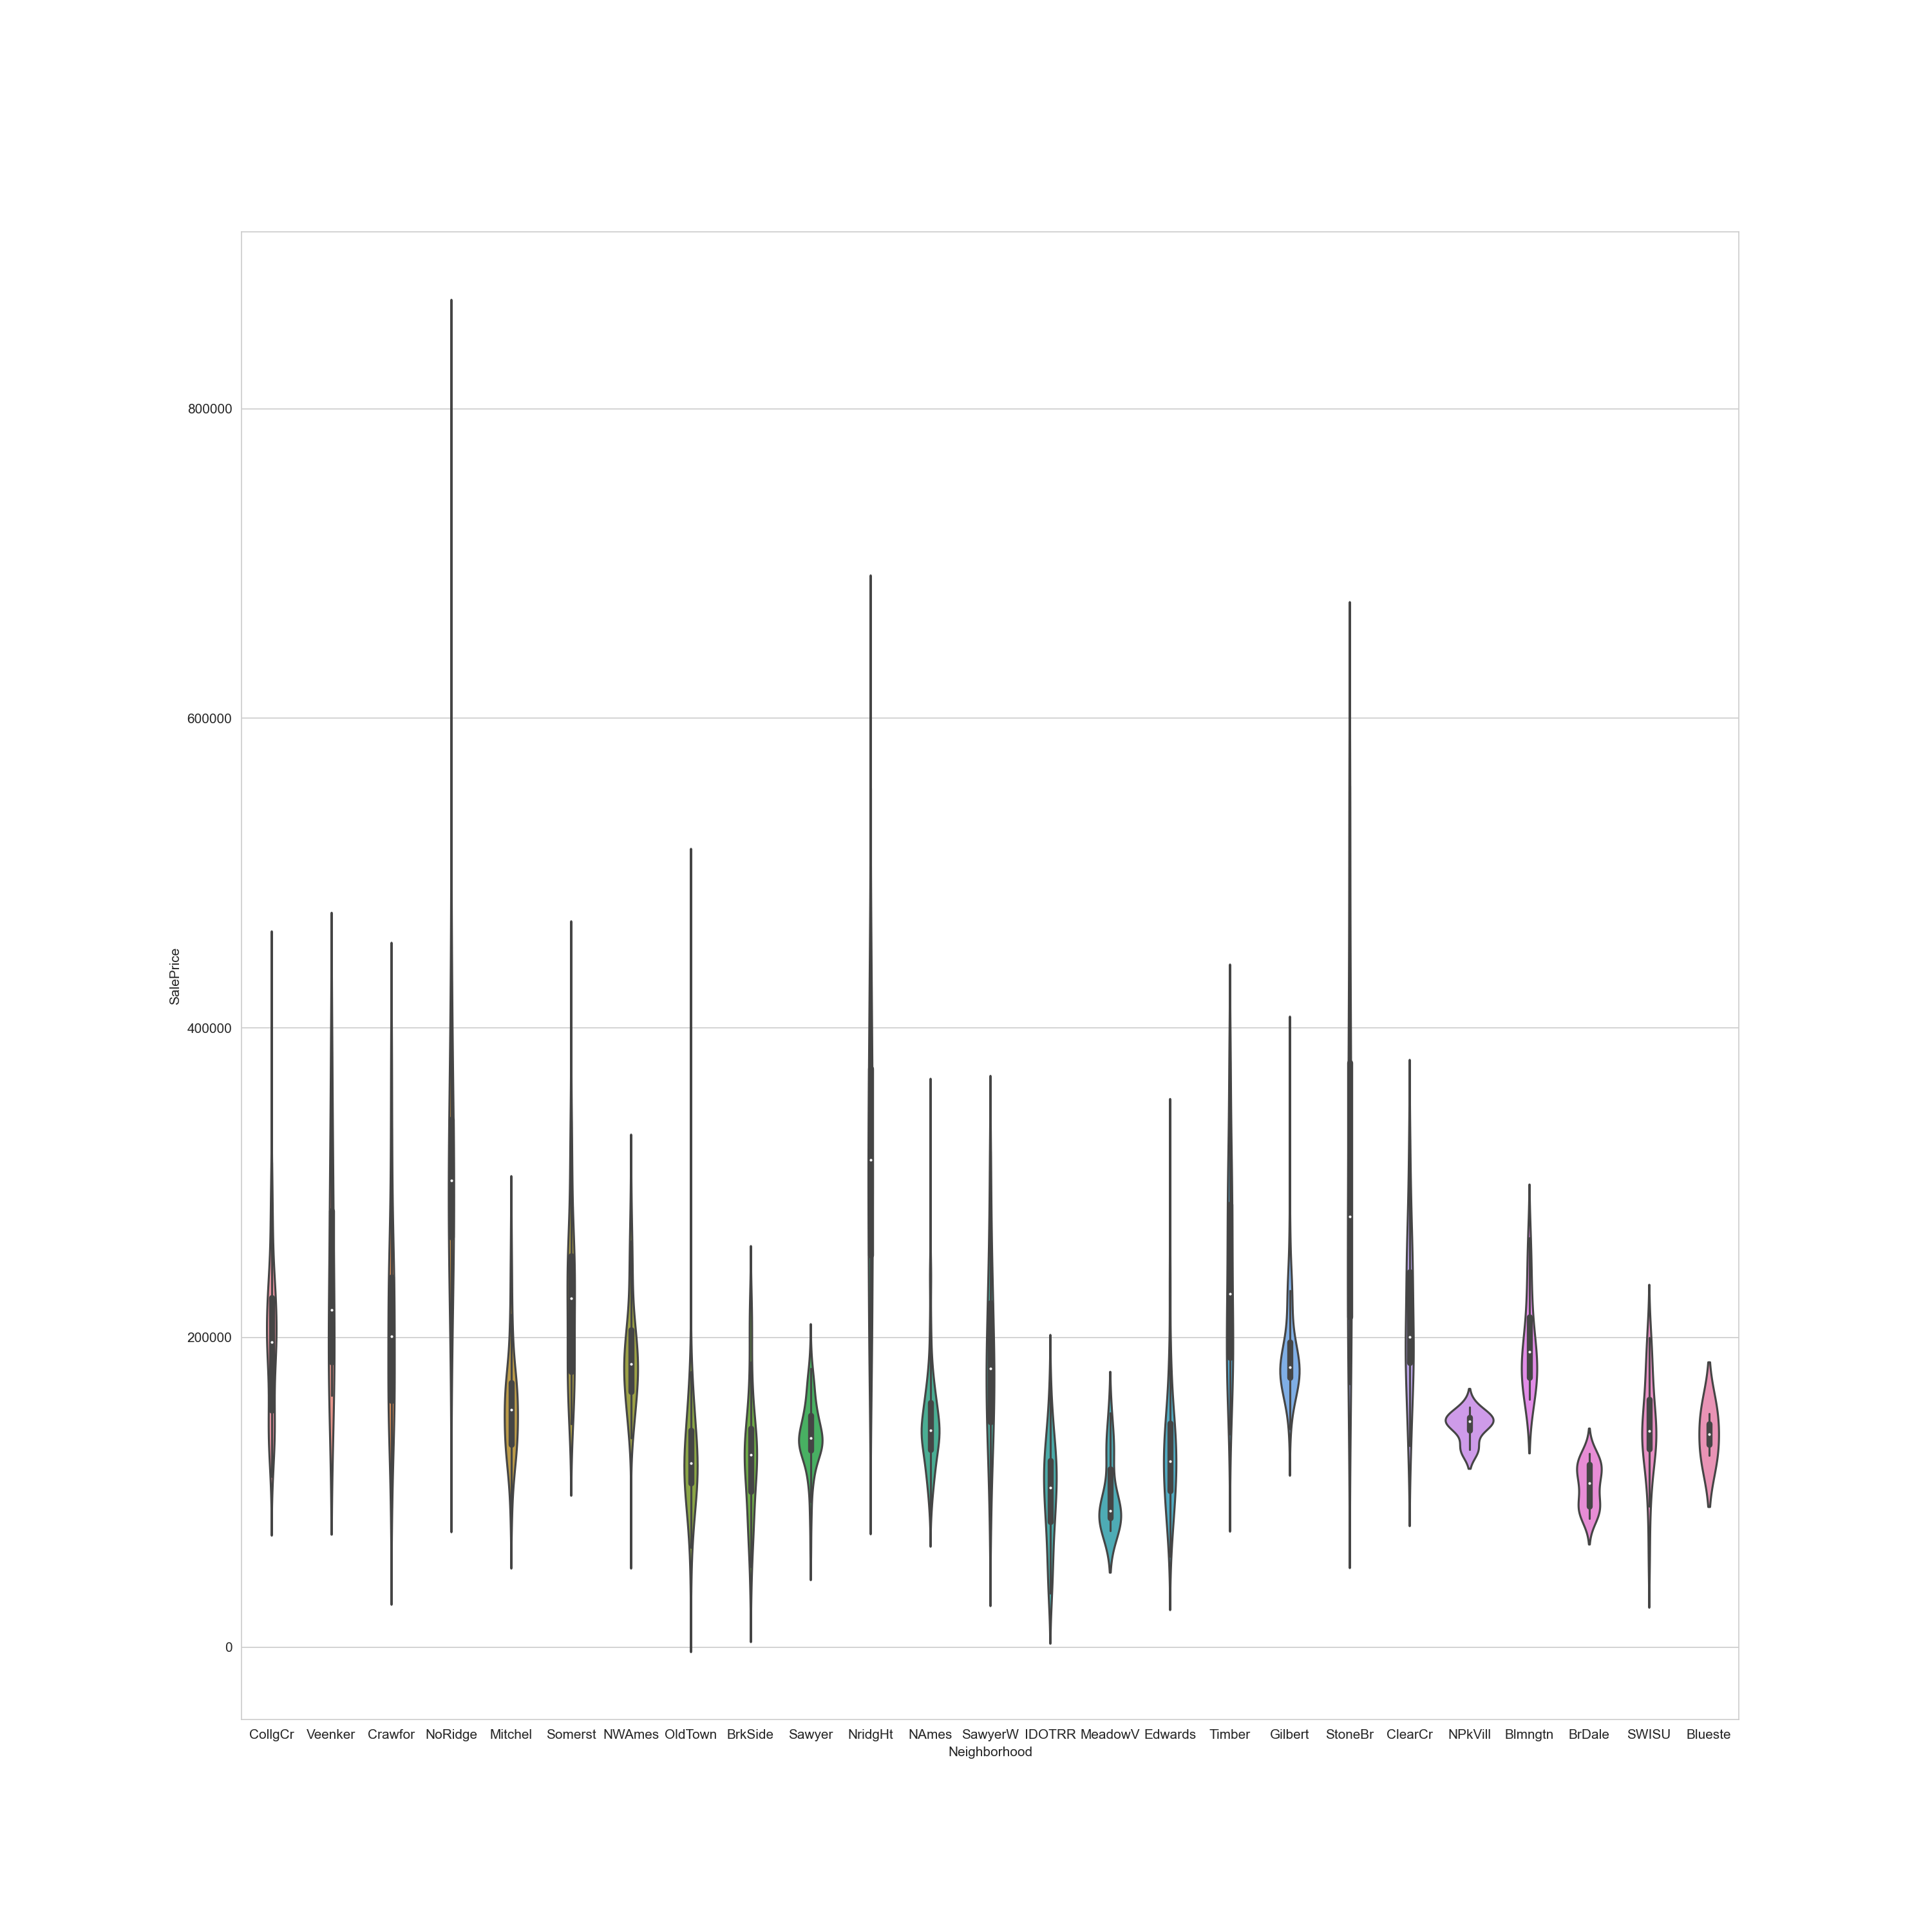

C:\Users\abrah\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


In [17]:
#Some neighborhoods do seem to sell higher than others 
fig,ax = plt.subplots(figsize = (20,20))
sns.violinplot('Neighborhood', 'SalePrice', data = housing, ax = ax)
plt.show()

<IPython.core.display.Javascript object>


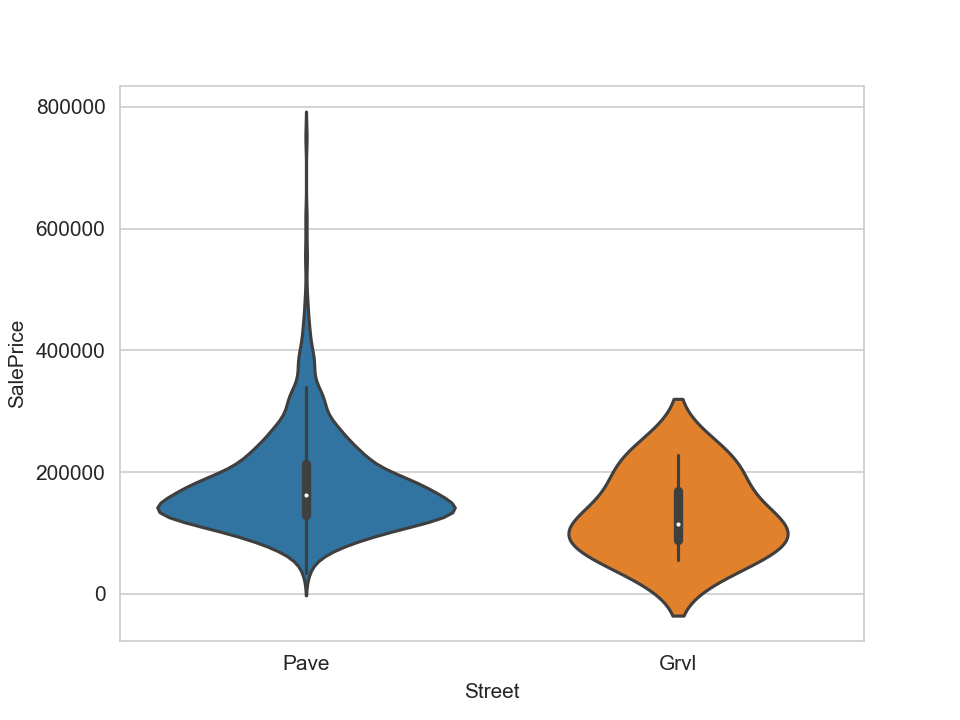

C:\Users\abrah\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Street', ylabel='SalePrice'>

In [18]:
#Aside from outlier street doesn't seem to matter
fig, ax = plt.subplots()
sns.violinplot('Street', 'SalePrice', data = housing)

<IPython.core.display.Javascript object>


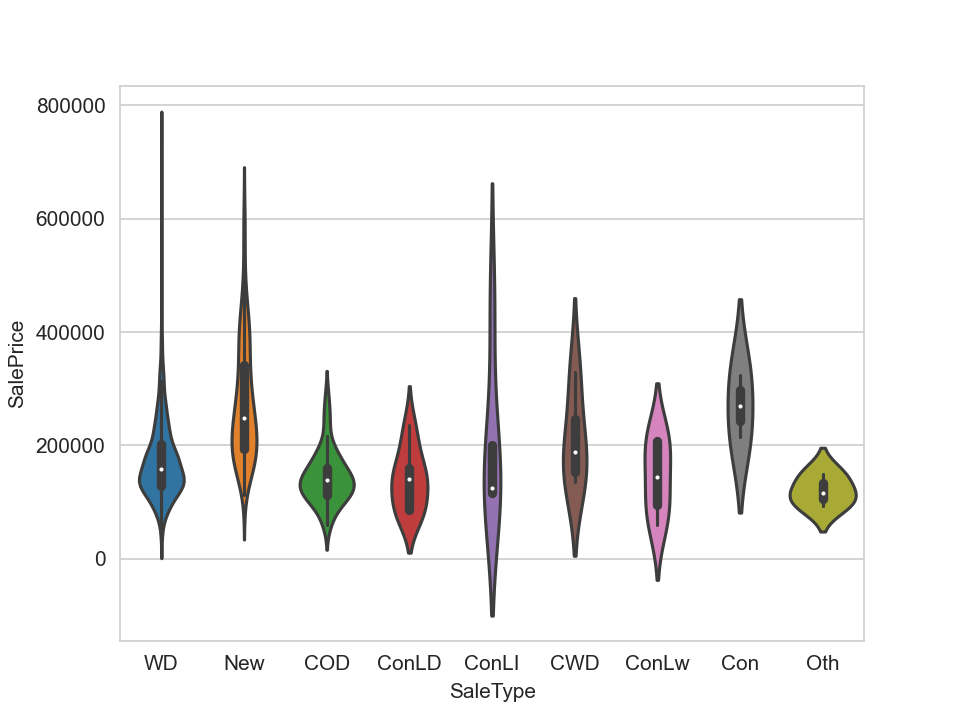

C:\Users\abrah\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SaleType', ylabel='SalePrice'>

In [19]:
#Some minor variation in saletype
fig, ax = plt.subplots()
sns.violinplot('SaleType', 'SalePrice', data = housing)

<IPython.core.display.Javascript object>


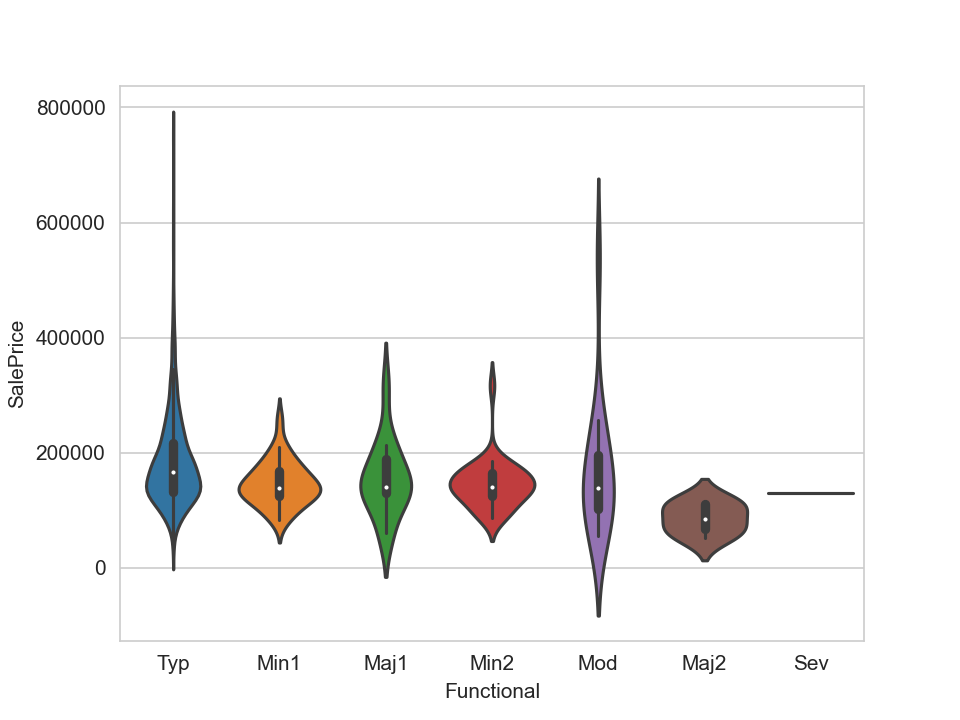

C:\Users\abrah\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Functional', ylabel='SalePrice'>

In [20]:
fig, ax = plt.subplots()
sns.violinplot('Functional', 'SalePrice', data = housing)

# Categorical Data Observations
It is hard for me to see the relationship between housing prices and most of the categorical data. Perhaps this will become more evident after the one_hot encoding.

# Further Data Cleaning.
With regards to the numeric data it seems reasonable to drop some very highly correlated features. Looking at the heatmap above we consider the following
- Year Sold vs Garage Year Built (Lets keep Year Sold since garage year built has missing data)
- Totale Basement SF vs first floor SF lets keep total basement
- Garage Cars vs Garage Area lets keep cars
- Lets drop the ID

We encode the ordinal data with an ordinal encoding and the categorical data with a one-hot (dummy) encoding


In [21]:
#We drop the variables that were too correlated for use
drop = ['Id','GarageArea','1stFlrSF','GarageYrBlt']
housing = housing.drop(columns = drop)

In [22]:
#Here we divie the numeric data into one_hot_encoded, ordinal, and categorical. We encode the encoded data
housing_numeric = housing.select_dtypes(include=[np.number])

numeric_unbounded = ['LotArea', 'MasVnrArea','BsmtFinSF1','BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF','2ndFlrSF','LowQualFinSF','GrLivArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch', 'ScreenPorch', 'SalePrice', 'Age','AgeRemodel']
numeric_one_hot = ['MSSubClass','MoSold']

housing_numeric_unbounded = housing_numeric[numeric_unbounded]
housing_numeric_one_hot = housing_numeric[numeric_one_hot]
housing_numeric_ordinal = housing_numeric.drop(columns = numeric_unbounded + numeric_one_hot)

month_mapper = {1:'Jan',2:'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6:'Jun', 7: 'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov',12:'Dec'}

housing_numeric_one_hot['MSSubClass'] = housing_numeric_one_hot['MSSubClass'].astype('str')
housing_numeric_one_hot['MoSold'] = housing_numeric_one_hot['MoSold'].replace(month_mapper)
housing_numeric_one_hot = pd.get_dummies(housing_numeric_one_hot)
housing_numeric_one_hot.head()


<ipython-input-22-69b94c3b3035>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  housing_numeric_one_hot['MSSubClass'] = housing_numeric_one_hot['MSSubClass'].astype('str')
<ipython-input-22-69b94c3b3035>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  housing_numeric_one_hot['MoSold'] = housing_numeric_one_hot['MoSold'].replace(month_mapper)


MSSubClass_120  MSSubClass_160  MSSubClass_180  MSSubClass_190  \
0               0               0               0               0   
1               0               0               0               0   
2               0               0               0               0   
3               0               0               0               0   
4               0               0               0               0   

   MSSubClass_20  MSSubClass_30  MSSubClass_40  MSSubClass_45  MSSubClass_50  \
0              0              0              0              0              0   
1              1              0              0              0              0   
2              0              0              0              0              0   
3              0              0              0              0              0   
4              0              0              0              0              0   

   MSSubClass_60  ...  MoSold_Dec  MoSold_Feb  MoSold_Jan  MoSold_Jul  \
0              1  ...           0           1           0           0   
1              0  ...           0           0           0           0   
2              1  ...           0           0           0           0   
3              0  ...           0           1           0           0   
4              1  ...           1           0           0           0   

   MoSold_Jun  MoSold_Mar  MoSold_May  MoSold_Nov  MoSold_Oct  MoSold_Sep  
0           0           0           0           0           0           0  
1           0           0           1           0           0           0  
2           0           0           0           0           0           1  
3           0           0           0           0           0           0  
4           0           0           0           0           0           0  

[5 rows x 27 columns]

In [23]:
#We separate out the categorical data and the ordinal data for encoding. We one hot encode the one hot encoding data

housing_cat = housing.select_dtypes(exclude=[np.number])

cat_ordinal = ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure','BsmtFinType1', 'HeatingQC', 'KitchenQual','Functional',
          'GarageFinish', 'GarageQual', 'GarageCond']

housing_cat_ordinal = housing_cat[cat_ordinal]
housing_cat_one_hot = housing_cat.drop(columns = cat_ordinal)

housing_cat_one_hot = pd.get_dummies(housing_cat_one_hot)

housing_cat_one_hot.head()


MSZoning_C (all)  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  \
0                 0            0            0            1            0   
1                 0            0            0            1            0   
2                 0            0            0            1            0   
3                 0            0            0            1            0   
4                 0            0            0            1            0   

   Street_Grvl  Street_Pave  LotShape_IR1  LotShape_IR2  LotShape_IR3  ...  \
0            0            1             0             0             0  ...   
1            0            1             0             0             0  ...   
2            0            1             1             0             0  ...   
3            0            1             1             0             0  ...   
4            0            1             1             0             0  ...   

   SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
0               0             0             0            1   
1               0             0             0            1   
2               0             0             0            1   
3               0             0             0            1   
4               0             0             0            1   

   SaleCondition_Abnorml  SaleCondition_AdjLand  SaleCondition_Alloca  \
0                      0                      0                     0   
1                      0                      0                     0   
2                      0                      0                     0   
3                      1                      0                     0   
4                      0                      0                     0   

   SaleCondition_Family  SaleCondition_Normal  SaleCondition_Partial  
0                     0                     1                      0  
1                     0                     1                      0  
2                     0                     1                      0  
3                     0                     0                      0  
4                     0                     1                      0  

[5 rows x 178 columns]

In [24]:
#We impute and ordinally encode the categorical data

housing_cat_ordinal.fillna('None', inplace = True)

qual_mapper = {'None':0, 'Po':1, 'Fa':2,'TA':3,'Gd':4,'Ex':5}
fin_mapper = {'None':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6}
func_mapper = {'Sal':0,'Sev':1,'Maj2':2,'Maj1':3,'Mod':4,'Min2':5, 'Min1':6,'Typ':7}
garfin_mapper = {'None':0,'Unf':1,'RFn':2,'Fin':3}
exp_mapper = {'None':0,'No':1, 'Mn':2, 'Av':3,'Gd':4}

housing_cat_ordinal['ExterQual'] = housing_cat_ordinal['ExterQual'].replace(qual_mapper)
housing_cat_ordinal['ExterCond'] = housing_cat_ordinal['ExterCond'].replace(qual_mapper)
housing_cat_ordinal['BsmtQual'] = housing_cat_ordinal['BsmtQual'].replace(qual_mapper)
housing_cat_ordinal['BsmtCond'] = housing_cat_ordinal['BsmtCond'].replace(qual_mapper)
housing_cat_ordinal['BsmtExposure'] = housing_cat_ordinal['BsmtExposure'].replace(exp_mapper)
housing_cat_ordinal['BsmtFinType1'] = housing_cat_ordinal['BsmtFinType1'].replace(fin_mapper)
housing_cat_ordinal['HeatingQC'] = housing_cat_ordinal['HeatingQC'].replace(qual_mapper)
housing_cat_ordinal['KitchenQual'] = housing_cat_ordinal['KitchenQual'].replace(qual_mapper)
housing_cat_ordinal['Functional'] = housing_cat_ordinal['Functional'].replace(func_mapper)
housing_cat_ordinal['GarageFinish'] = housing_cat_ordinal['GarageFinish'].replace(garfin_mapper)
housing_cat_ordinal['GarageQual'] = housing_cat_ordinal['GarageQual'].replace(qual_mapper)
housing_cat_ordinal['GarageCond'] = housing_cat_ordinal['GarageCond'].replace(qual_mapper)

C:\Users\abrah\anaconda3\lib\site-packages\pandas\core\frame.py:4462: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(
<ipython-input-24-026ac5344406>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  housing_cat_ordinal['ExterQual'] = housing_cat_ordinal['ExterQual'].replace(qual_mapper)
<ipython-input-24-026ac5344406>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

In [25]:
#We concatenate everything to get the three main divisions of our dataset
housing_ordinal = pd.concat([housing_numeric_ordinal,housing_cat_ordinal], axis = 'columns')
housing_one_hot = pd.concat([housing_numeric_one_hot, housing_cat_one_hot], axis = 'columns')

housing_clean = pd.concat([housing_one_hot, housing_ordinal, housing_numeric_unbounded], axis = 'columns')

In [26]:
housing_clean.head()

MSSubClass_120  MSSubClass_160  MSSubClass_180  MSSubClass_190  \
0               0               0               0               0   
1               0               0               0               0   
2               0               0               0               0   
3               0               0               0               0   
4               0               0               0               0   

   MSSubClass_20  MSSubClass_30  MSSubClass_40  MSSubClass_45  MSSubClass_50  \
0              0              0              0              0              0   
1              1              0              0              0              0   
2              0              0              0              0              0   
3              0              0              0              0              0   
4              0              0              0              0              0   

   MSSubClass_60  ...  LowQualFinSF  GrLivArea  WoodDeckSF  OpenPorchSF  \
0              1  ...             0       1710           0           61   
1              0  ...             0       1262         298            0   
2              1  ...             0       1786           0           42   
3              0  ...             0       1717           0           35   
4              1  ...             0       2198         192           84   

   EnclosedPorch  3SsnPorch  ScreenPorch  SalePrice  Age  AgeRemodel  
0              0          0            0     208500    5           5  
1              0          0            0     181500   31          31  
2              0          0            0     223500    7           6  
3            272          0            0     140000   91          36  
4              0          0            0     250000    8           8  

[5 rows x 245 columns]

In [41]:
ordinal_prices = pd.concat([housing_ordinal, housing['SalePrice']], axis = 'columns')
ordinal_corr_matrix = ordinal_prices.corr()

In [42]:
ordinal_corr_matrix['SalePrice'].sort_values(ascending = False)

SalePrice       1.000000
OverallQual     0.793055
ExterQual       0.684381
KitchenQual     0.660666
GarageCars      0.640954
BsmtQual        0.585748
FullBath        0.561887
GarageFinish    0.549590
TotRmsAbvGrd    0.535030
HeatingQC       0.427736
BsmtExposure    0.375258
BsmtFinType1    0.305011
HalfBath        0.284214
GarageQual      0.273837
GarageCond      0.263189
BsmtFullBath    0.227181
BsmtCond        0.212604
BedroomAbvGr    0.168209
Functional      0.107613
ExterCond       0.018907
BsmtHalfBath   -0.016837
YrSold         -0.028906
OverallCond    -0.077846
KitchenAbvGr   -0.135903
Name: SalePrice, dtype: float64

<IPython.core.display.Javascript object>


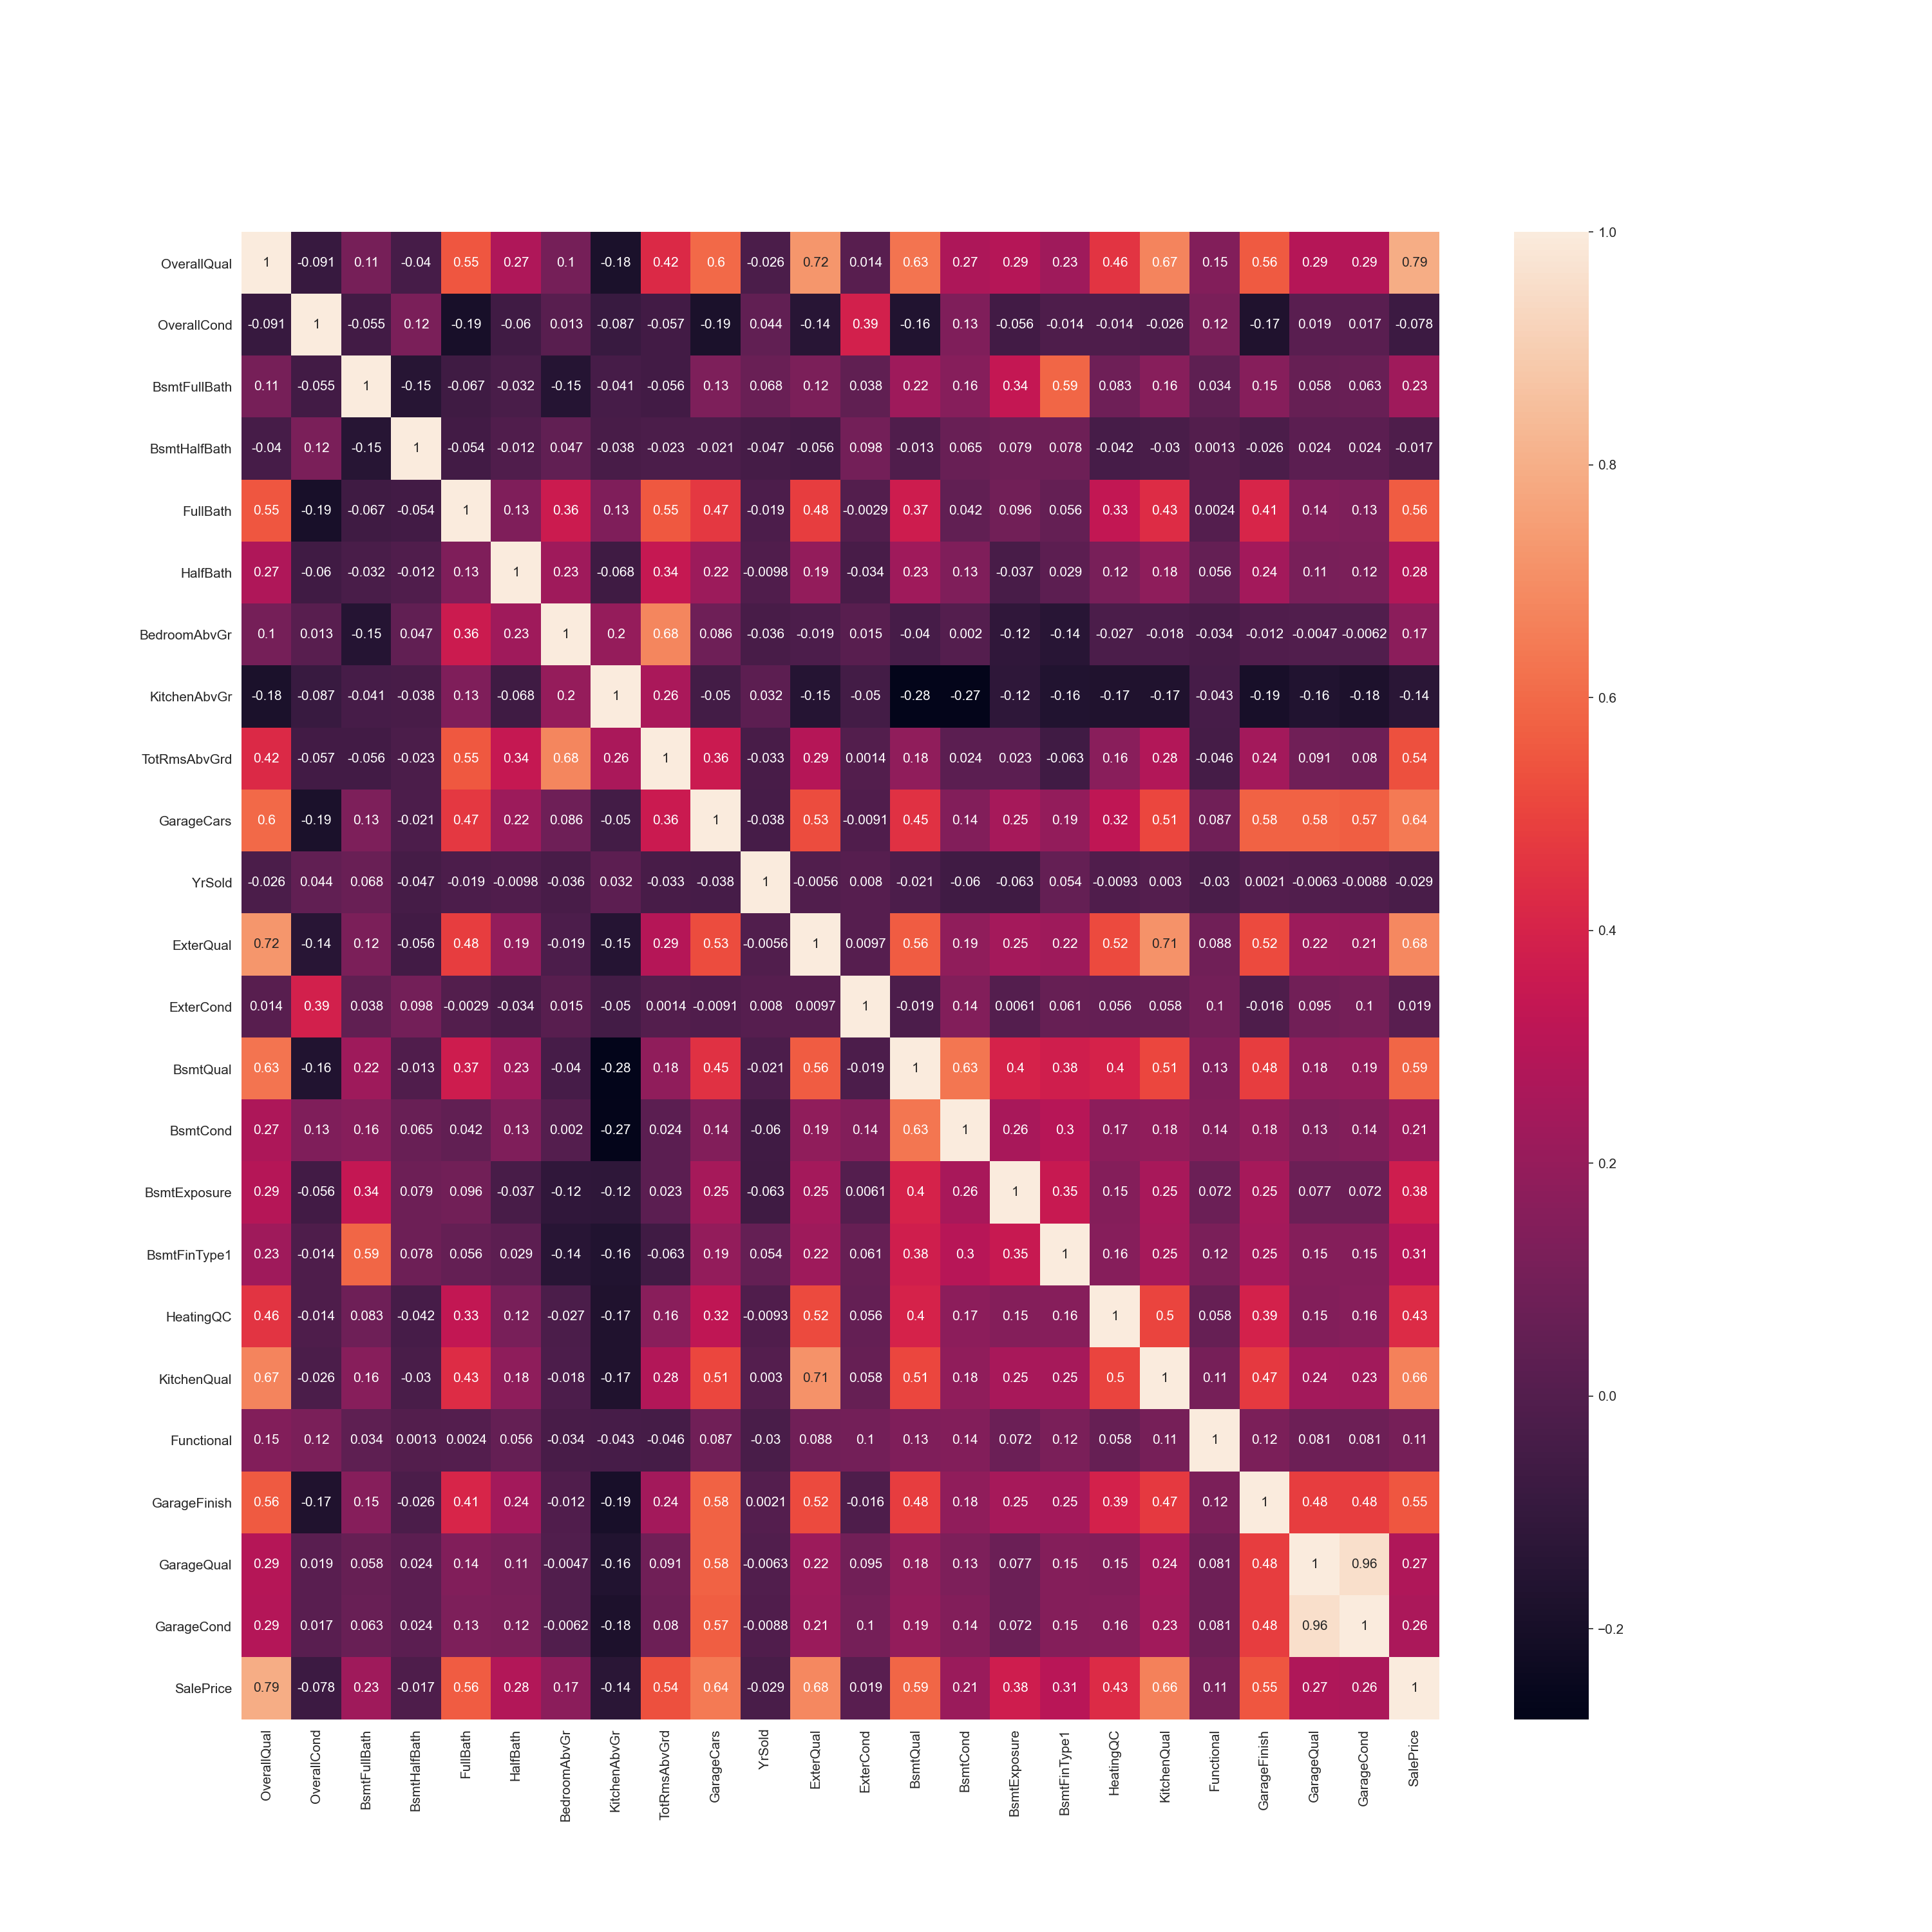

In [43]:
fig, ax = plt.subplots(figsize=(20,20)) 
sns.heatmap(ordinal_corr_matrix,annot = True, ax = ax)
plt.show()

The above is a heatmap for the ordinal data. We notice some correlations between basement quality, kitchen quality in addition to what we had before. Garage quality and Garage Condition are so closely correlated to each other we can drop one. Lets drop the Garage Condition and keep everything else.

<IPython.core.display.Javascript object>


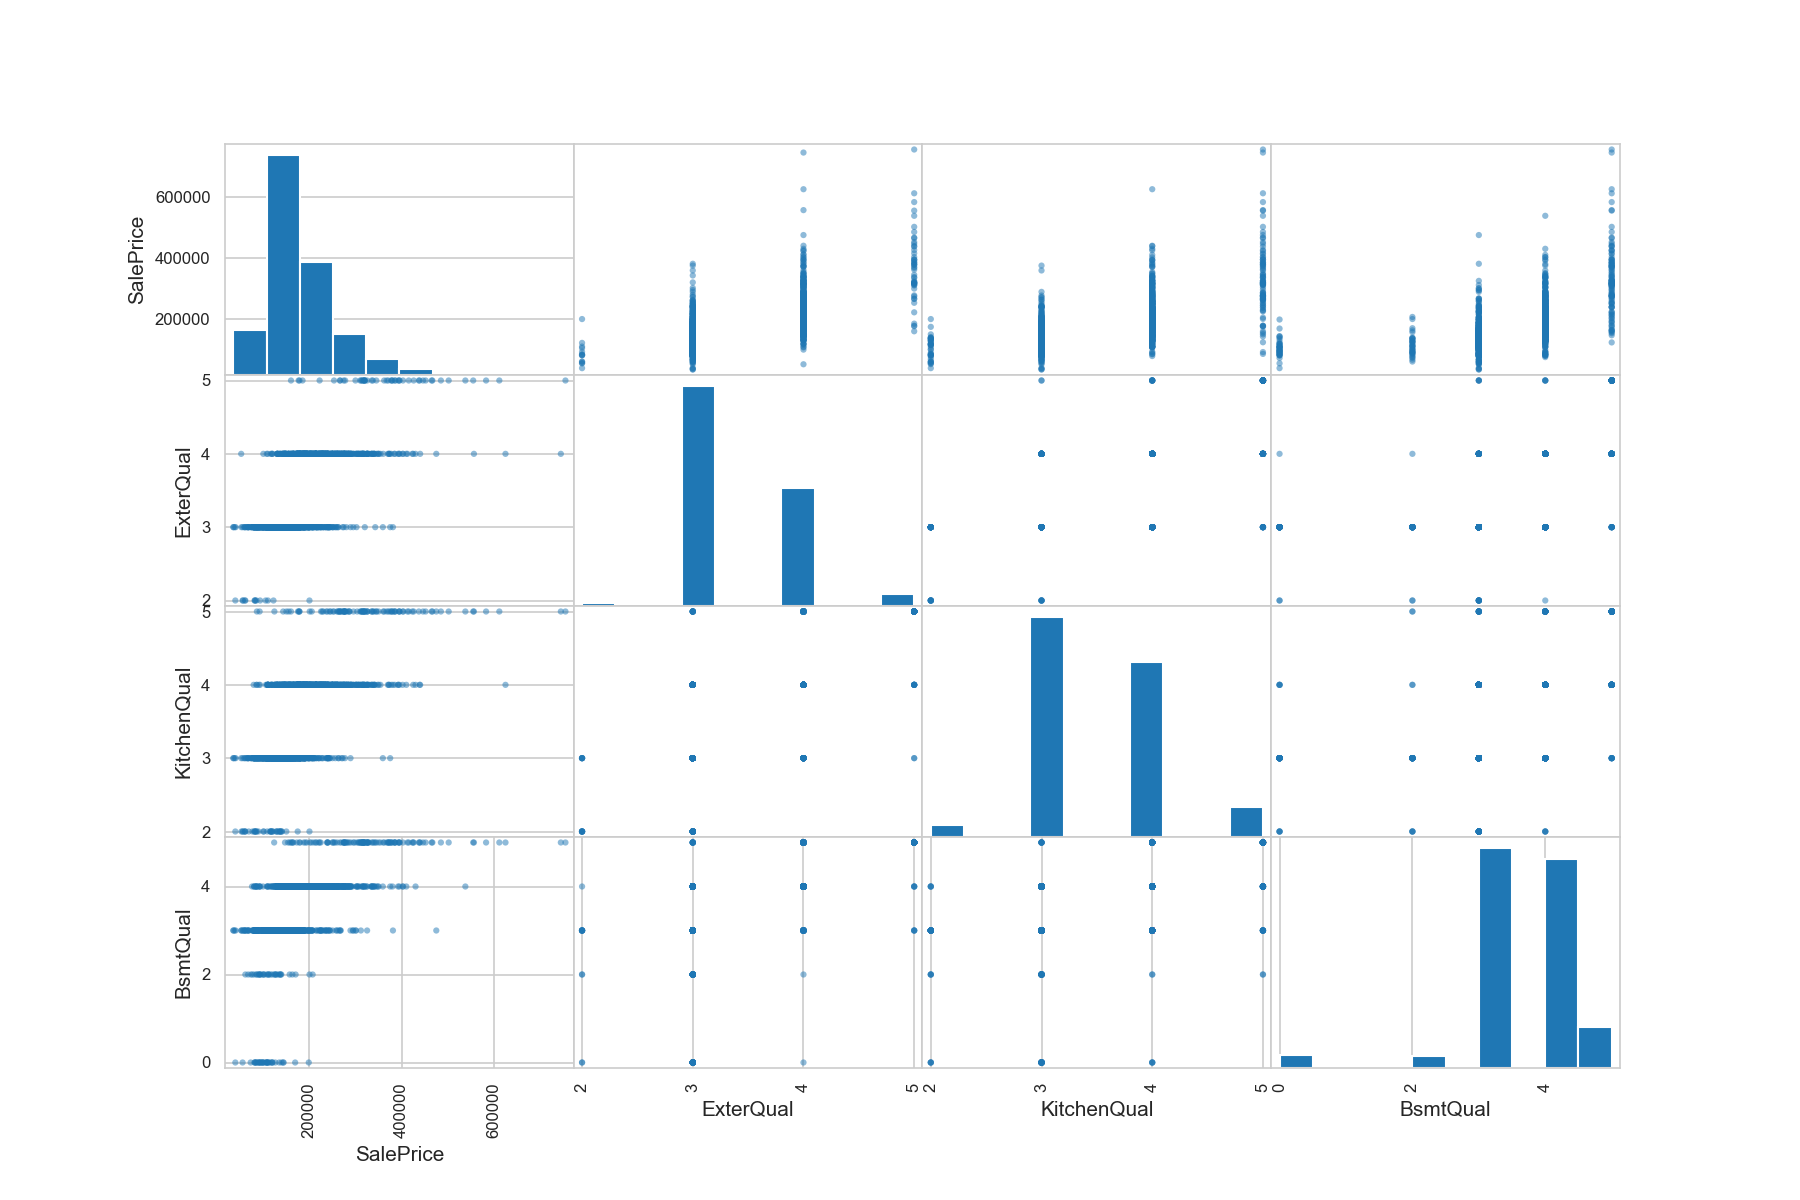

array([[<AxesSubplot:xlabel='SalePrice', ylabel='SalePrice'>,
        <AxesSubplot:xlabel='ExterQual', ylabel='SalePrice'>,
        <AxesSubplot:xlabel='KitchenQual', ylabel='SalePrice'>,
        <AxesSubplot:xlabel='BsmtQual', ylabel='SalePrice'>],
       [<AxesSubplot:xlabel='SalePrice', ylabel='ExterQual'>,
        <AxesSubplot:xlabel='ExterQual', ylabel='ExterQual'>,
        <AxesSubplot:xlabel='KitchenQual', ylabel='ExterQual'>,
        <AxesSubplot:xlabel='BsmtQual', ylabel='ExterQual'>],
       [<AxesSubplot:xlabel='SalePrice', ylabel='KitchenQual'>,
        <AxesSubplot:xlabel='ExterQual', ylabel='KitchenQual'>,
        <AxesSubplot:xlabel='KitchenQual', ylabel='KitchenQual'>,
        <AxesSubplot:xlabel='BsmtQual', ylabel='KitchenQual'>],
       [<AxesSubplot:xlabel='SalePrice', ylabel='BsmtQual'>,
        <AxesSubplot:xlabel='ExterQual', ylabel='BsmtQual'>,
        <AxesSubplot:xlabel='KitchenQual', ylabel='BsmtQual'>,
        <AxesSubplot:xlabel='BsmtQual', ylabel='BsmtQual'

In [37]:
attributes = ['SalePrice','ExterQual','KitchenQual','BsmtQual']
scatter_matrix(housing_clean[attributes], figsize = (12, 8))

In [59]:
one_hot_prices = pd.concat([housing_one_hot, housing['SalePrice']], axis = 'columns')
one_hot_corr_matrix = one_hot_prices.corr()

In [61]:
one_hot_corr_matrix['SalePrice'].filter(like = 'Neighborhood').sort_values(ascending = False)

Neighborhood_NridgHt    0.402164
Neighborhood_NoRidge    0.330433
Neighborhood_StoneBr    0.215369
Neighborhood_Somerst    0.140069
Neighborhood_Timber     0.126243
Neighborhood_CollgCr    0.072640
Neighborhood_Crawfor    0.071167
Neighborhood_Veenker    0.063474
Neighborhood_ClearCr    0.055723
Neighborhood_Gilbert    0.035948
Neighborhood_NWAmes     0.023491
Neighborhood_Blmngtn    0.019069
Neighborhood_SawyerW    0.014567
Neighborhood_Blueste   -0.020249
Neighborhood_NPkVill   -0.037907
Neighborhood_Mitchel   -0.057840
Neighborhood_SWISU     -0.063702
Neighborhood_BrDale    -0.101300
Neighborhood_MeadowV   -0.112541
Neighborhood_Sawyer    -0.128389
Neighborhood_BrkSide   -0.143643
Neighborhood_IDOTRR    -0.164052
Neighborhood_Edwards   -0.180916
Neighborhood_NAmes     -0.188510
Neighborhood_OldTown   -0.192185
Name: SalePrice, dtype: float64

In [62]:
one_hot_corr_matrix['SalePrice'].filter(like = 'MSZoning').sort_values(ascending = False)

MSZoning_RL         0.245069
MSZoning_FV         0.089958
MSZoning_RH        -0.065426
MSZoning_C (all)   -0.111254
MSZoning_RM        -0.288069
Name: SalePrice, dtype: float64

In [63]:
one_hot_corr_matrix['SalePrice'].filter(like = 'Utilities').sort_values(ascending = False)

Utilities_AllPub    0.014313
Utilities_NoSeWa   -0.014313
Name: SalePrice, dtype: float64

In [65]:
one_hot_corr_matrix['SalePrice'].filter(like = 'HouseStyle').sort_values(ascending = False)

HouseStyle_2Story    0.243020
HouseStyle_2.5Fin    0.036528
HouseStyle_2.5Unf   -0.025853
HouseStyle_SLvl     -0.038639
HouseStyle_1Story   -0.061799
HouseStyle_1.5Unf   -0.087684
HouseStyle_SFoyer   -0.093085
HouseStyle_1.5Fin   -0.163461
Name: SalePrice, dtype: float64

In [66]:
one_hot_corr_matrix['SalePrice'].filter(like = 'BldgType').sort_values(ascending = False)

BldgType_1Fam      0.137478
BldgType_TwnhsE    0.003814
BldgType_2fmCon   -0.097344
BldgType_Twnhs    -0.098726
BldgType_Duplex   -0.114650
Name: SalePrice, dtype: float64

In [67]:
housing_clean = housing_clean.drop(columns = ['GarageCond'])

# Summary
I cleaned the data by splitting into ordinal, categorical, and unbounded data. I imputed ordinal data by including a None category for not having a feature like a garage. After converting the ordinal and categorical data into numeric data via ordinal and one-hot encoding I did some looking into the correlation and plotting. Some further feature engineering could be taking care of what appears to be the heteroskedasticity in some of these scatter plots via log transforms. We can consider additional features like bedroom/room ratios. The only thing I did down this avenue was replace the year the house was built with the age, and same for the time since remodelling. But this should be ready for machine learning algorithms at this point.